In [1]:
from layer import Dense, Dropout, Conv2d, Flatten, MaxPool2d
from activation import LeakyReLU
from solver import SGD
from loss import CrossEntropyLoss
from data import Dataset
from network import Network
from utils import *

import numpy as np
import matplotlib.pyplot as plt
import joblib

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

# CIFAR

In [2]:
cifar_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# get channels 2nd
X_train = X_train.transpose(0, 3, 1, 2)
X_test = X_test.transpose(0, 3, 1, 2)

In [4]:
# data to 1d array
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# one hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

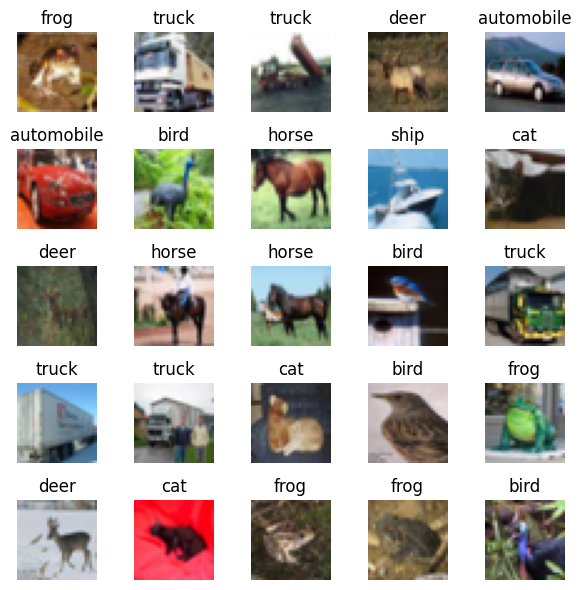

In [5]:
show_grid(X_train[:25], y_train[:25], class_names=cifar_labels)

In [6]:
# normalization
mean = np.mean(X_train, axis=(0,2,3)).reshape(1, 3, 1, 1)
std = np.std(X_train, axis=(0,2,3)).reshape(1, 3, 1, 1)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [7]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

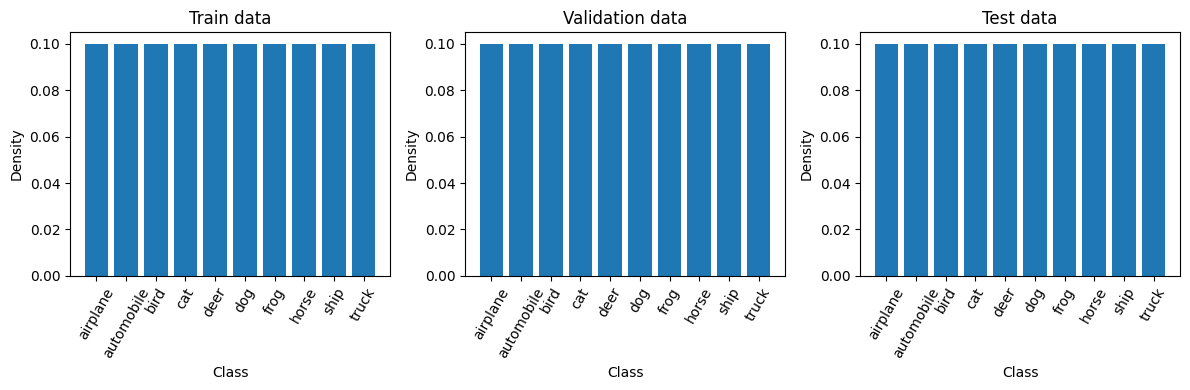

In [8]:
plot_class_balance([np.argmax(y_train, axis=1), np.argmax(y_val, axis=1), np.argmax(y_test, axis=1)], cifar_labels, tilt=60)

In [9]:
train_data = Dataset(X_train, y_train)
val_data = Dataset(X_val, y_val)
test_data = Dataset(X_test, y_test)

train_data_trans = Dataset(X_train, y_train, transform=transform_cifar_dataset)

In [10]:
solver = SGD(lr=0.1)
loss = CrossEntropyLoss()

early_stopping={
    'patience': 25,
    'min_delta': 0,
    'restore_best_parameters': True
}

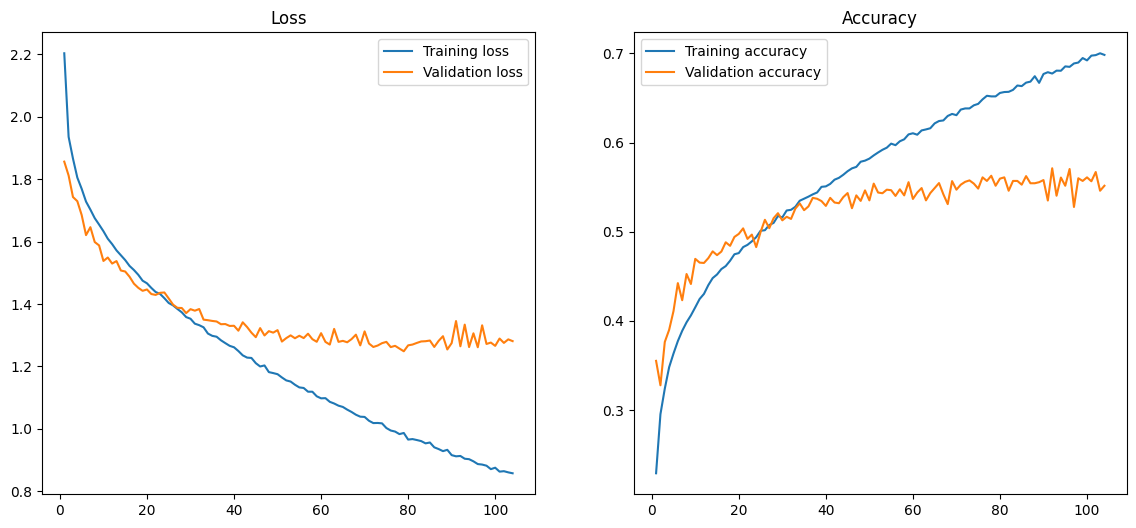

{'epoch_stopped': 104, 'epoch_params': 79}

Acc: 0.5588

              precision    recall  f1-score   support

    airplane     0.6227    0.6850    0.6524      1000
  automobile     0.7368    0.6300    0.6792      1000
        bird     0.4646    0.4130    0.4373      1000
         cat     0.3278    0.5730    0.4170      1000
        deer     0.4162    0.6180    0.4974      1000
         dog     0.5211    0.2470    0.3351      1000
        frog     0.6582    0.5930    0.6239      1000
       horse     0.7300    0.5760    0.6439      1000
        ship     0.7497    0.6500    0.6963      1000
       truck     0.6760    0.6030    0.6374      1000

    accuracy                         0.5588     10000
   macro avg     0.5903    0.5588    0.5620     10000
weighted avg     0.5903    0.5588    0.5620     10000



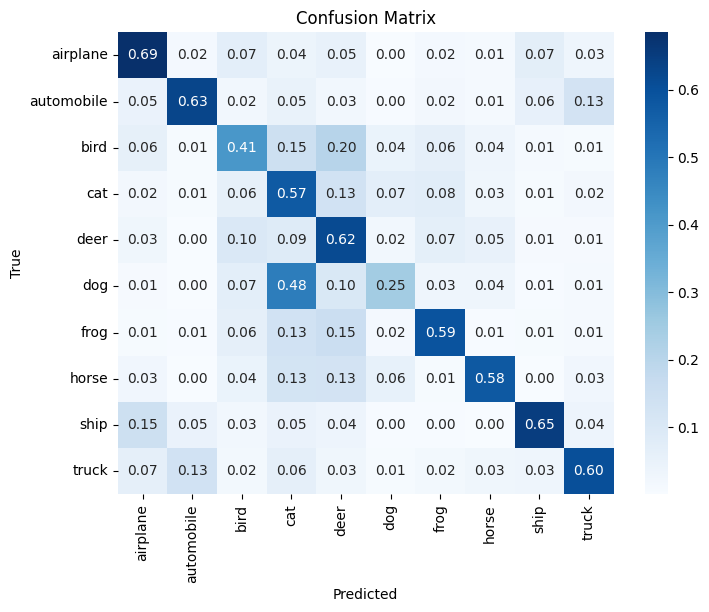

In [11]:
cifar_nn_1 = Network([
    Flatten(),
    
    Dense(2048),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(1024),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(512),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(256),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(10),
])

cifar_nn_1.compile(loss, solver)

try:
    cifar_nn_1 = joblib.load('models//cifar_nn_1.joblib')
except:
    history = cifar_nn_1.train(dataset=train_data, epochs=300, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(cifar_nn_1, 'models//cifar_nn_1.joblib')

plot_hist(cifar_nn_1.history)

try:
    print(cifar_nn_1.early_stopped)
except:
    pass

y_pred = cifar_nn_1.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=cifar_labels)

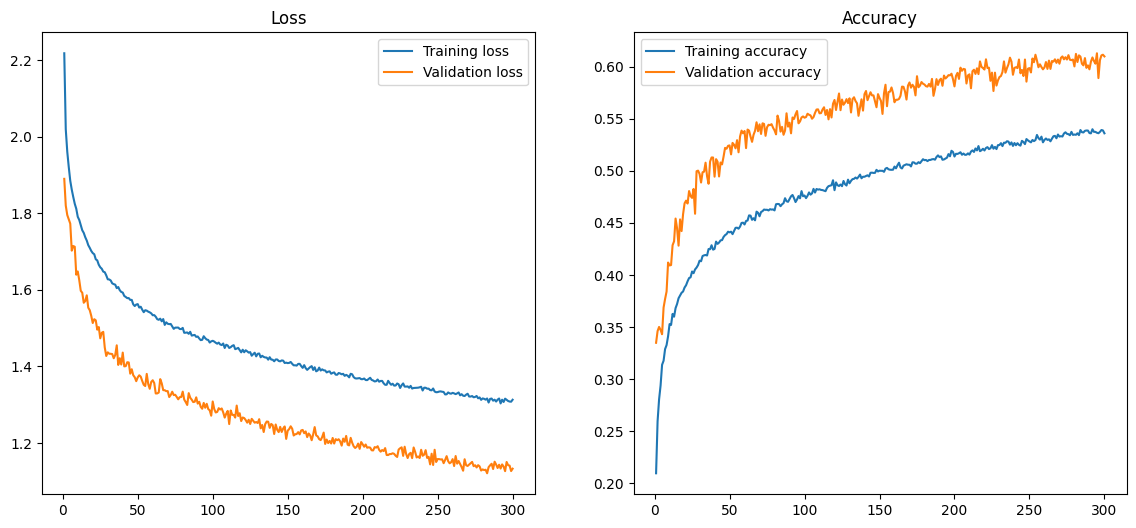


Acc: 0.6089

              precision    recall  f1-score   support

    airplane     0.6149    0.7330    0.6688      1000
  automobile     0.7357    0.7070    0.7211      1000
        bird     0.6364    0.2870    0.3956      1000
         cat     0.4103    0.4460    0.4274      1000
        deer     0.5236    0.5660    0.5440      1000
         dog     0.4896    0.5190    0.5039      1000
        frog     0.6522    0.7350    0.6911      1000
       horse     0.7002    0.6750    0.6874      1000
        ship     0.7430    0.7170    0.7298      1000
       truck     0.6331    0.7040    0.6667      1000

    accuracy                         0.6089     10000
   macro avg     0.6139    0.6089    0.6036     10000
weighted avg     0.6139    0.6089    0.6036     10000



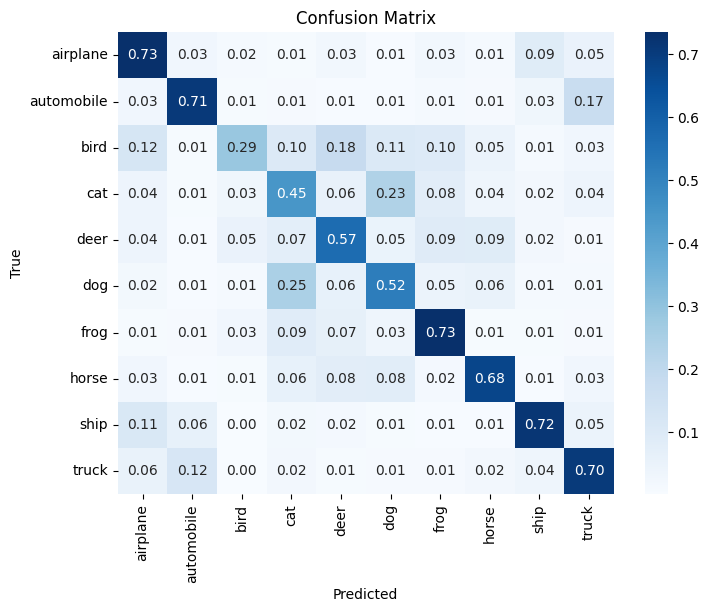

In [12]:
cifar_nn_2 = Network([
    Flatten(),
    
    Dense(2048),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(1024),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(512),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(256),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(10),
])

cifar_nn_2.compile(loss, solver)

try:
    cifar_nn_2 = joblib.load('models//cifar_nn_2.joblib')
except:
    history = cifar_nn_2.train(dataset=train_data_trans, epochs=300, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(cifar_nn_2, 'models//cifar_nn_2.joblib')

plot_hist(cifar_nn_2.history)

try:
    print(cifar_nn_2.early_stopped)
except:
    pass

y_pred = cifar_nn_2.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=cifar_labels)

In [13]:
for nn in (cifar_nn_1, cifar_nn_2):
    print(nn.param_count())

9050378
9050378
